# Portfolio Backtesting

This notebook evaluates the historical performance of portfolio strategies by backtesting.  
Backtesting simulates how a portfolio would have performed using historical data.

**Key Steps:**
1. **Data Loading:** Upload the cleaned price data and compute weekly returns.
2. **Cumulative Returns:** Compute the cumulative returns over time.
3. **Performance Metrics:** Calculate annualized return, volatility, Sharpe ratio, maximum drawdown, and Calmar ratio.
4. **Backtesting:** Evaluate the portfolio performance using given weight vectors.
5. **Visualization:** Plot cumulative returns and drawdown curves

before you proceed, take a look at the glossary:

## Technical Glossary:
- **Cumulative Return:** The compounded return of an investment over time.
- **Annualized Return/Volatility:** Returns and risk scaled to a yearly basis.
- **Maximum Drawdown:** The largest loss from a peak to a trough.
- **Calmar Ratio:** Ratio of annualized return to the absolute value of maximum drawdown.

In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from scipy.optimize import minimize

sns.set(style="whitegrid", context="talk", palette="deep")

print("Libraries imported successfully!")


Libraries imported successfully!


In [ ]:
from google.colab import files

# Upload your processed CSV file (e.g., historical_prices_cleaned.csv)
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load cleaned price data
prices = pd.read_csv(filename, index_col=0, parse_dates=True)
print("Cleaned Price Data (first 5 rows):")
print(prices.head())

def compute_returns(prices):
    returns = prices.pct_change(fill_method=None).dropna()
    return returns

returns = compute_returns(prices)
cum_returns = (1 + returns).cumprod()
print("Cumulative Returns (first 5 rows):")
print(cum_returns.head())


Saving historical_prices_cleaned.csv to historical_prices_cleaned.csv
Cleaned Price Data (first 5 rows):
              AMZN         GE      GOOGL        HSY        MMM       MSFT  \
Date                                                                        
2012-01-01  9.1305  69.240280  16.208012  44.837509  46.040127  22.132902   
2012-01-08  8.9210  69.945709  15.583897  45.421150  46.167137  22.243130   
2012-01-15  9.5465  71.096581  14.611446  45.465488  47.299232  23.392693   
2012-01-22  9.7685  70.651070  14.461590  45.243847  48.298786  23.014755   
2012-01-29  9.3840  70.613945  14.869270  45.184734  48.447895  23.809998   

                  SHY  
Date                   
2012-01-01  71.186943  
2012-01-08  71.245903  
2012-01-15  71.229073  
2012-01-22  71.304886  
2012-01-29  71.237541  
Cumulative Returns (first 5 rows):
                AMZN        GE     GOOGL       HSY       MMM      MSFT  \
Date                                                                     
2012

## Performance Metrics Calculation

This function calculates:
- **Annualized Return:** Based on the cumulative return over the total period.
- **Annualized Volatility:** Standard deviation scaled by the square root of the number of periods per year.
- **Sharpe Ratio:** Ratio of annualized return to annualized volatility.
- **Maximum Drawdown:** The worst decline from a peak.
- **Calmar Ratio:** Annualized return divided by the absolute maximum drawdown.

In [1]:
def compute_performance_metrics(test_returns, weights, periods_per_year=52):

    port_returns = test_returns.dot(weights)
    cumulative_returns = (1 + port_returns).cumprod()

    total_periods = len(cumulative_returns)
    annualized_return = cumulative_returns.iloc[-1]**(periods_per_year / total_periods) - 1
    annualized_volatility = port_returns.std() * np.sqrt(periods_per_year)
    sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility > 0 else np.nan

    # Compute maximum drawdown
    cumulative_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()

    # Calmar ratio: Annualized return divided by absolute value of maximum drawdown
    calmar_ratio = annualized_return / abs(max_drawdown) if max_drawdown < 0 else np.nan

    return {
        "cumulative_returns": cumulative_returns,
        "annualized_return": annualized_return,
        "annualized_volatility": annualized_volatility,
        "sharpe_ratio": sharpe_ratio,
        "max_drawdown": max_drawdown,
        "calmar_ratio": calmar_ratio
    }

# Example usage:
# metrics = compute_performance_metrics(returns, np.array([0.2,0.15,0.1,...]))
# print(metrics)


## Backtesting the Portfolio

We create a function to backtest a portfolio using the computed returns and a weight vector.
For demonstration, two example weight vectors (naive and Bayesian) are used.

In [ ]:
def backtest_portfolio(returns, weights):

    metrics = compute_performance_metrics(returns, weights)
    return metrics

# For demonstration, assume you have two sets of weights:
# Replace these with actual weights from your optimization notebooks.
assets = returns.columns.tolist()  # e.g., ["MSFT", "MMM", "HSY", "GE", "GOOGL", "AMZN", "SHY"]

# Example weight vectors (they must sum to 1)
naive_weights = np.array([0.20, 0.15, 0.10, 0.15, 0.20, 0.10, 0.10])
bayesian_weights = np.array([0.1587, 0.0, 0.0, 0.2126, 0.0, 0.3065, 0.3222])

# Backtest both portfolios
naive_metrics = backtest_portfolio(returns, naive_weights)
bayesian_metrics = backtest_portfolio(returns, bayesian_weights)

print("Naive Portfolio Performance:")
print(naive_metrics)
print("\nBayesian Portfolio Performance:")
print(bayesian_metrics)


Naive Portfolio Performance:
{'cumulative_returns': Date
2012-01-08    0.996174
2012-01-15    1.016542
2012-01-22    1.021291
2012-01-29    1.019912
2012-02-05    1.013541
                ...   
2023-11-26    5.182846
2023-12-03    5.201154
2023-12-10    5.243023
2023-12-17    5.330173
2023-12-24    5.368851
Length: 625, dtype: float64, 'annualized_return': 0.15007491567424802, 'annualized_volatility': 0.15494722885192438, 'sharpe_ratio': 0.9685550157058143, 'max_drawdown': -0.2556074661269415, 'calmar_ratio': 0.5871304072147752}

Bayesian Portfolio Performance:
{'cumulative_returns': Date
2012-01-08    1.000919
2012-01-15    1.028043
2012-01-22    1.026034
2012-01-29    1.029894
2012-02-05    1.024866
                ...   
2023-11-26    5.913066
2023-12-03    5.881744
2023-12-10    5.859248
2023-12-17    5.916415
2023-12-24    5.943534
Length: 625, dtype: float64, 'annualized_return': 0.15984652310401537, 'annualized_volatility': 0.12185791341180746, 'sharpe_ratio': 1.311745118791169

## Visualization: Cumulative Returns and Drawdowns

Interactive plots display cumulative returns, and additional charts show the drawdown curves.

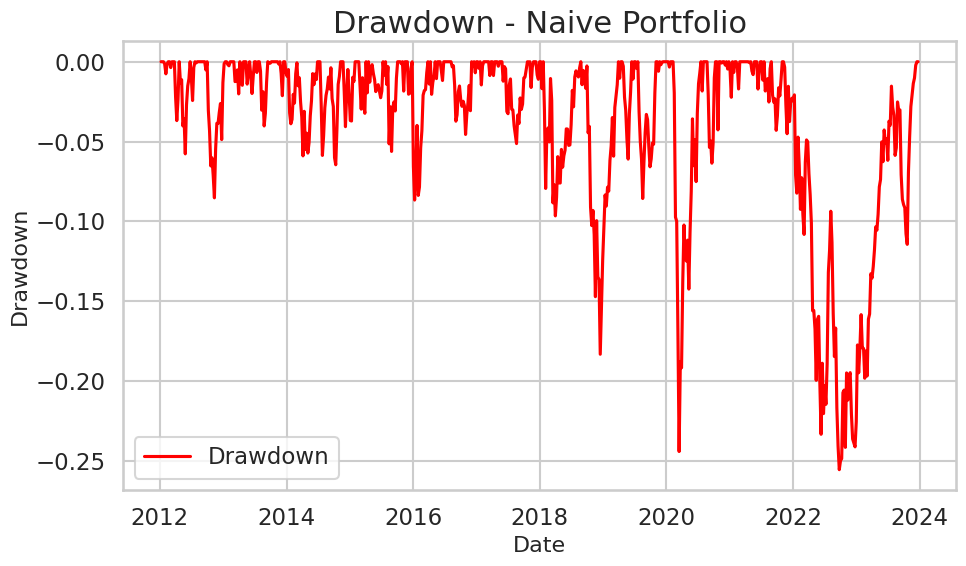

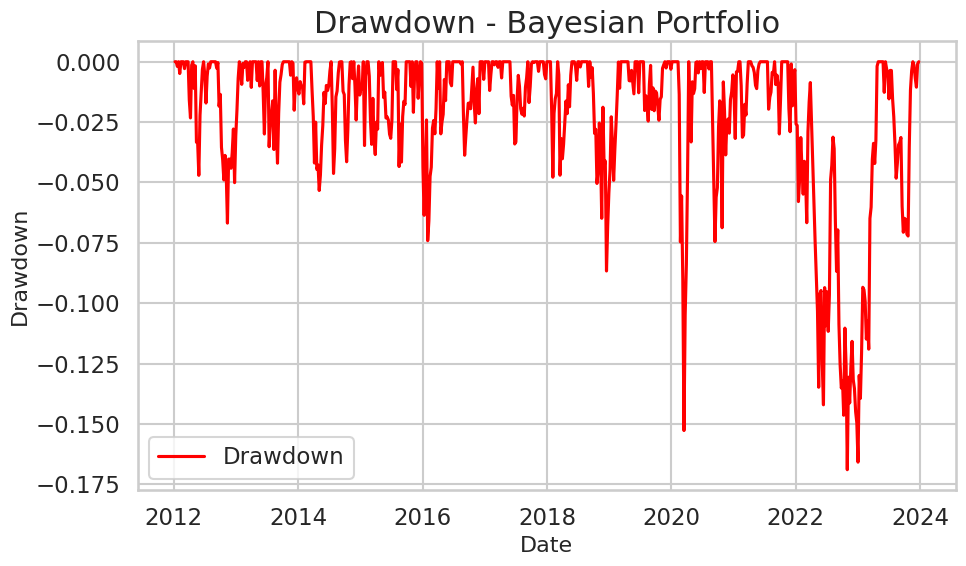

In [ ]:
# Plot cumulative returns for each portfolio using Plotly Express
import plotly.express as px

# Prepare DataFrames for cumulative returns
naive_cum_df = pd.DataFrame({
    "Date": naive_metrics["cumulative_returns"].index,
    "Naive Cumulative Return": naive_metrics["cumulative_returns"].values
})
bayesian_cum_df = pd.DataFrame({
    "Date": bayesian_metrics["cumulative_returns"].index,
    "Bayesian Cumulative Return": bayesian_metrics["cumulative_returns"].values
})

fig_naive = px.line(naive_cum_df, x="Date", y="Naive Cumulative Return",
                    title="Cumulative Returns - Naive Portfolio",
                    labels={"Naive Cumulative Return": "Cumulative Return"})
fig_naive.update_layout(title_font_size=24, xaxis_title="Date", yaxis_title="Cumulative Return")
fig_naive.show()

fig_bayes = px.line(bayesian_cum_df, x="Date", y="Bayesian Cumulative Return",
                    title="Cumulative Returns - Bayesian Portfolio",
                    labels={"Bayesian Cumulative Return": "Cumulative Return"})
fig_bayes.update_layout(title_font_size=24, xaxis_title="Date", yaxis_title="Cumulative Return")
fig_bayes.show()

# Plot drawdown curves for additional insight
def plot_drawdown(cum_returns, title):
    cumulative_max = cum_returns.cummax()
    drawdown = (cum_returns - cumulative_max) / cumulative_max
    plt.figure(figsize=(10,6))
    plt.plot(drawdown, label="Drawdown", color="red")
    plt.title(title, fontsize=22)
    plt.xlabel("Date", fontsize=16)
    plt.ylabel("Drawdown", fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_drawdown(naive_metrics["cumulative_returns"], "Drawdown - Naive Portfolio")
plot_drawdown(bayesian_metrics["cumulative_returns"], "Drawdown - Bayesian Portfolio")


In [ ]:
def monte_carlo(returns, scale_returns=1.0, scale_cov=1.0, num_sim=1000, horizon=52):

    np.random.seed(42)
    mean_ret = returns.mean() * scale_returns
    cov_matrix = returns.cov() * scale_cov
    num_assets = returns.shape[1]
    sims = []
    for _ in range(num_sim):
        sim = np.random.multivariate_normal(mean_ret, cov_matrix, horizon)
        sim_cum = (sim + 1).cumprod(axis=0)
        sims.append(sim_cum)
    return np.array(sims)

# Define stress scenarios
stress_scenarios = {
    "Baseline": {"scale_returns": 1.0, "scale_cov": 1.0},
    "Market Crash": {"scale_returns": 0.5, "scale_cov": 1.0},
    "High Volatility": {"scale_returns": 1.0, "scale_cov": 2.0},
    "Combined Stress": {"scale_returns": 0.5, "scale_cov": 2.0}
}

stress_simulations = {}
for scenario, params in stress_scenarios.items():
    stress_simulations[scenario] = monte_carlo(returns,
                                               scale_returns=params["scale_returns"],
                                               scale_cov=params["scale_cov"],
                                               num_sim=1000,
                                               horizon=52)

# For one scenario, compute VaR for the first asset
def compute_var(simulations, asset_index=0, confidence_level=5):
    final_returns = simulations[:, -1, asset_index]
    var = np.percentile(final_returns, confidence_level)
    return var

baseline_var = compute_var(stress_simulations["Baseline"], asset_index=0, confidence_level=5)
market_crash_var = compute_var(stress_simulations["Market Crash"], asset_index=0, confidence_level=5)
high_vol_var = compute_var(stress_simulations["High Volatility"], asset_index=0, confidence_level=5)
combined_var = compute_var(stress_simulations["Combined Stress"], asset_index=0, confidence_level=5)

print("5% VaR (First Asset):")
print(f"Baseline: {baseline_var:.4f}")
print(f"Market Crash: {market_crash_var:.4f}")
print(f"High Volatility: {high_vol_var:.4f}")
print(f"Combined Stress: {combined_var:.4f}")


5% VaR (First Asset):
Baseline: 0.7903
Market Crash: 0.6866
High Volatility: 0.6166
Combined Stress: 0.5352


In [ ]:

import plotly.express as px
import plotly.graph_objects as go

def plot_stress_simulation(sims, asset_index=0, num_paths=50, scenario=""):
    fig = go.Figure()
    for sim in sims[:num_paths]:
        fig.add_trace(go.Scatter(
            x=list(range(sim.shape[0])),
            y=sim[:, asset_index],
            mode="lines",
            line=dict(color="gray", width=1),
            opacity=0.3,
            showlegend=False
        ))
    fig.update_layout(
        title=f"{scenario} Scenario: Cumulative Returns for First Asset",
        xaxis_title="Weeks",
        yaxis_title="Cumulative Return",
        title_font_size=24
    )
    fig.show()

# Plot the simulation for "Combined Stress"
plot_stress_simulation(stress_simulations["Combined Stress"], asset_index=0, num_paths=50, scenario="Combined Stress")
